# -----------------------------------Clustering Assignment------------------------------------------

## By - Murlidhar Maindargikar
## PGDDS Feb-20 batch

## Mail - ID : muralimech12345@gmail.com

# -------------------------------------------------Start-------------------------------------------------------

# 1. Read the data

In [1]:
# Importing required libraries

import warnings
warnings.filterwarnings('ignore')


import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)

import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
# read the dataset
countries = pd.read_csv("Country-data.csv", sep=",",encoding="ISO-8859-1", header=0)
countries.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [3]:
# Check the shape of dataset

countries.shape

(167, 10)

In [4]:
# Observing the dataset column and datatype
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
country       167 non-null object
child_mort    167 non-null float64
exports       167 non-null float64
health        167 non-null float64
imports       167 non-null float64
income        167 non-null int64
inflation     167 non-null float64
life_expec    167 non-null float64
total_fer     167 non-null float64
gdpp          167 non-null int64
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [5]:
countries.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


# 2. Finding null values

In [6]:
# Checking for null values
countries.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

There are no null values present in the data set.

# 3. Converting column values for 'exports', 'health', 'imports' in actual values as they are given as %age of GDP per capita

In [7]:
# Converting the column values to actual which are represented as %age of GDP per capita
countries['exports_actual'] = (countries['exports']/100) * countries['gdpp']
countries['health_actual'] = (countries['health']/100) * countries['gdpp']
countries['imports_actual'] = (countries['imports']/100) * countries['gdpp']

#Dropping of the original columns which were in %age format
countries_1 = countries.drop(['exports','health','imports'], axis = 1)

In [8]:
countries_1.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
0,Afghanistan,90.2,1610,9.44,56.2,5.82,553,55.30,41.9174,248.297
1,Albania,16.6,9930,4.49,76.3,1.65,4090,1145.20,267.8950,1987.740
2,Algeria,27.3,12900,16.10,76.5,2.89,4460,1712.64,185.9820,1400.440
3,Angola,119.0,5900,22.40,60.1,6.16,3530,2199.19,100.6050,1514.370
4,Antigua and Barbuda,10.3,19100,1.44,76.8,2.13,12200,5551.00,735.6600,7185.800


# 4. Exploratory Data Analysis

## Univariate Analysis

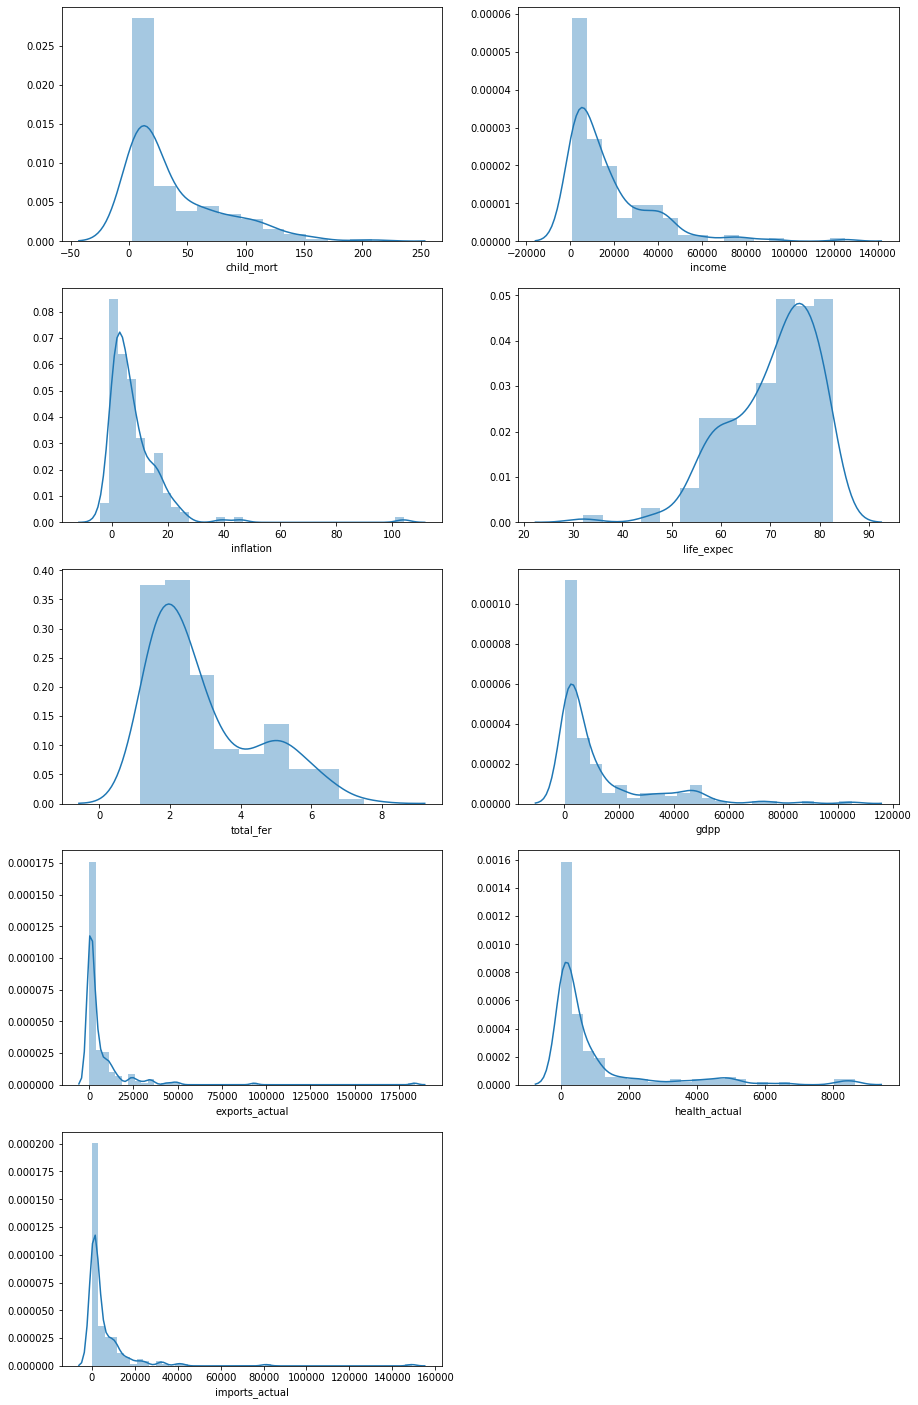

In [9]:
plt.figure(figsize = (15, 25))
feature = ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports_actual', 'health_actual', 'imports_actual']
for i in enumerate(feature):
    plt.subplot(5,2,i[0]+1)
    sns.distplot(countries_1[i[1]])

#### Inference :

#### 1. For child_mort, income, life_expec, total_fer, gdpp plots there are 2 peaks which can result in formation of 2 to 3 clusters.
#### 2. For Inflation, export_actual, health_actual, import_actual , curve has higher peak with very narrow width which shows concentration in one particular cluster.

## Bivariate Analysis

<Figure size 1080x1800 with 0 Axes>

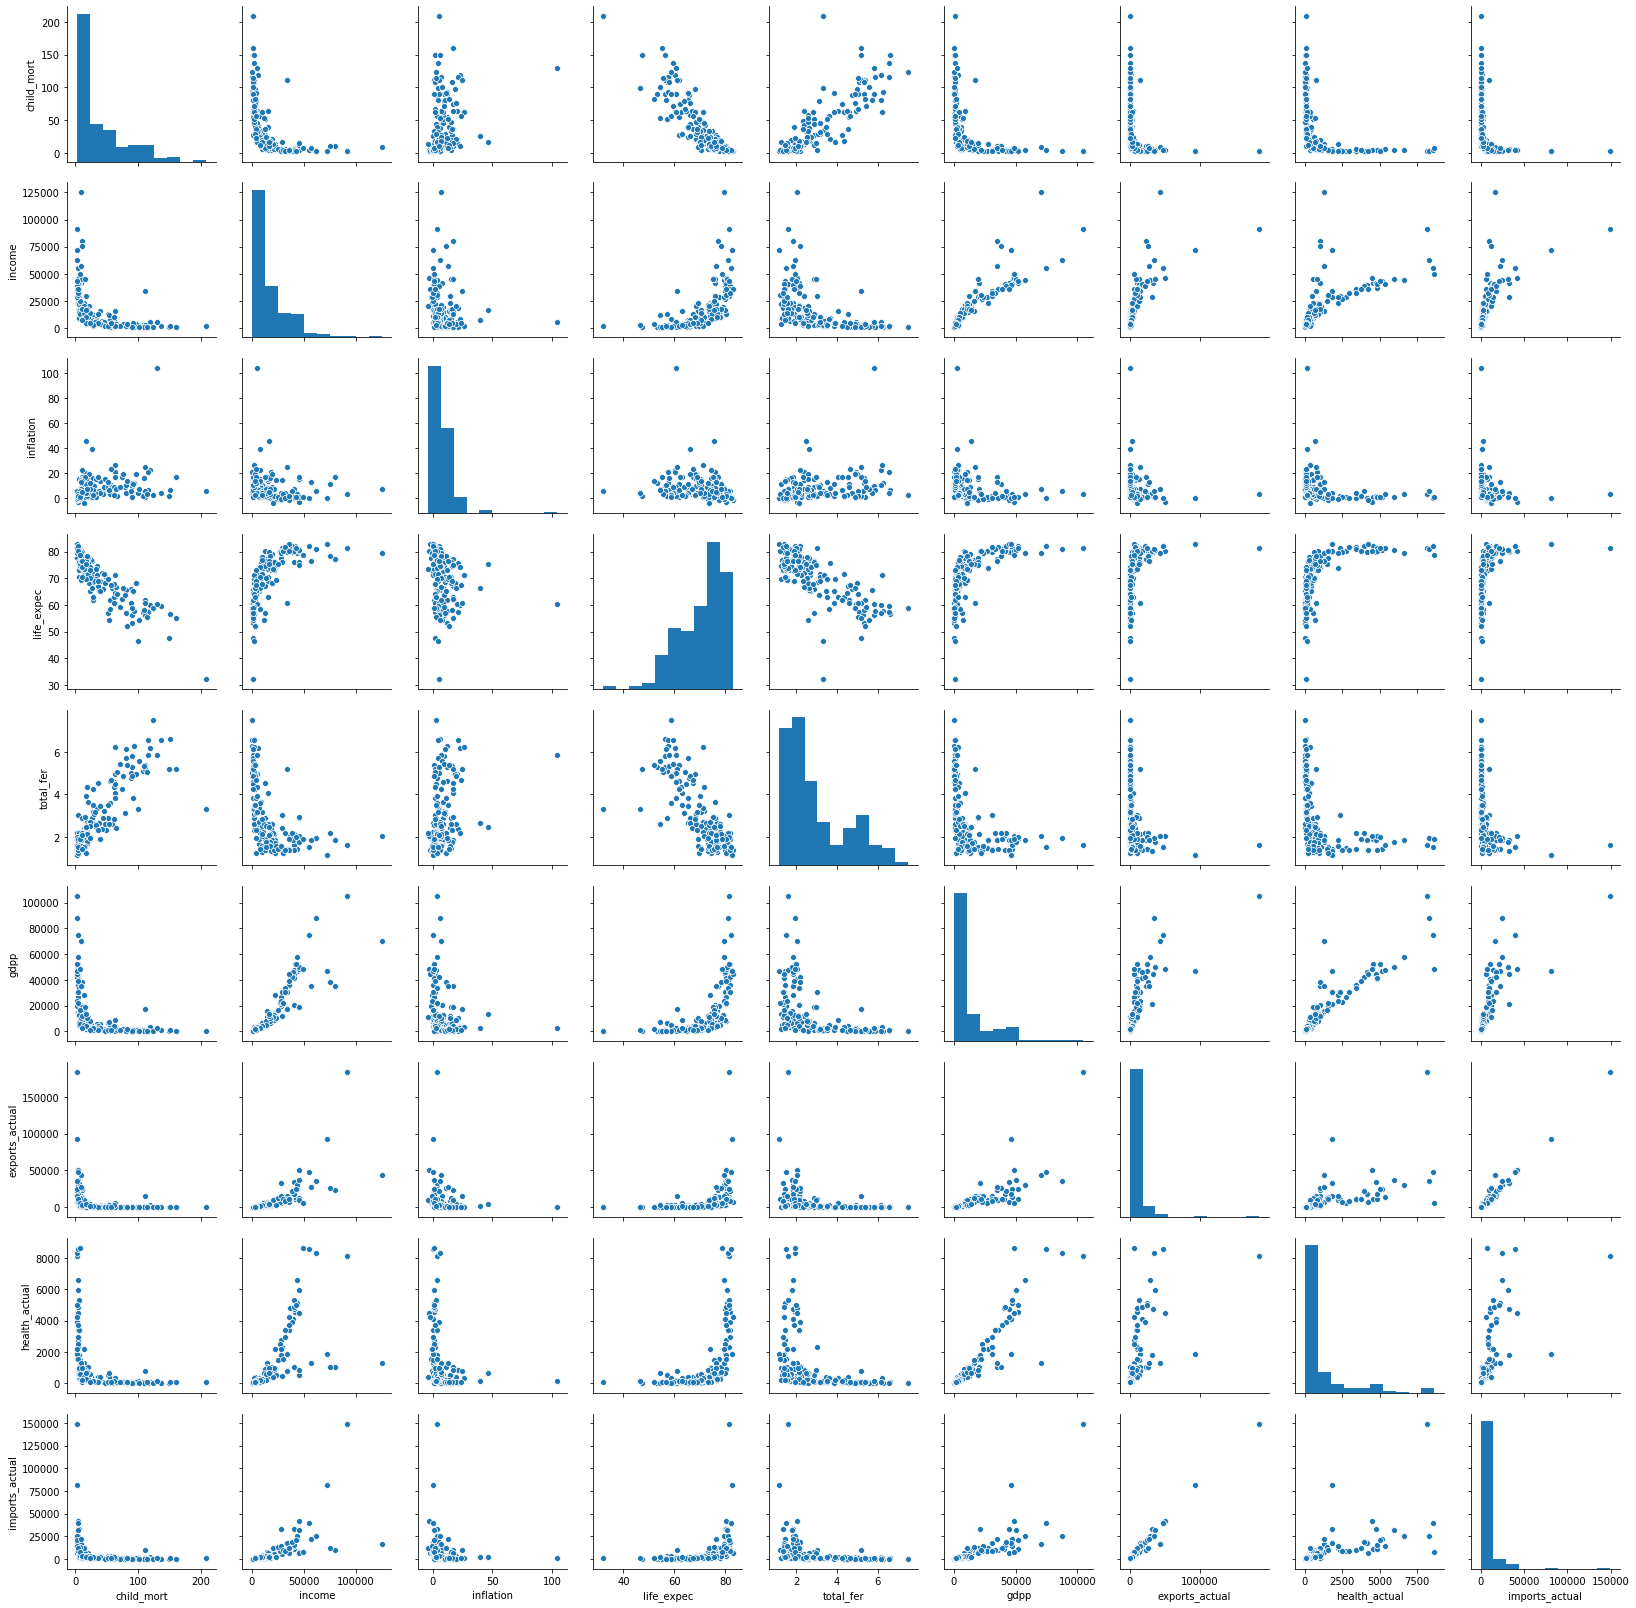

In [10]:
# Plotting pairplot for checking the relation between all numerical columns
plt.figure(figsize = (15, 25))
sns.pairplot(countries_1)
plt.show()

### Some of the important relations from above pair plot are as below

<Figure size 432x288 with 0 Axes>

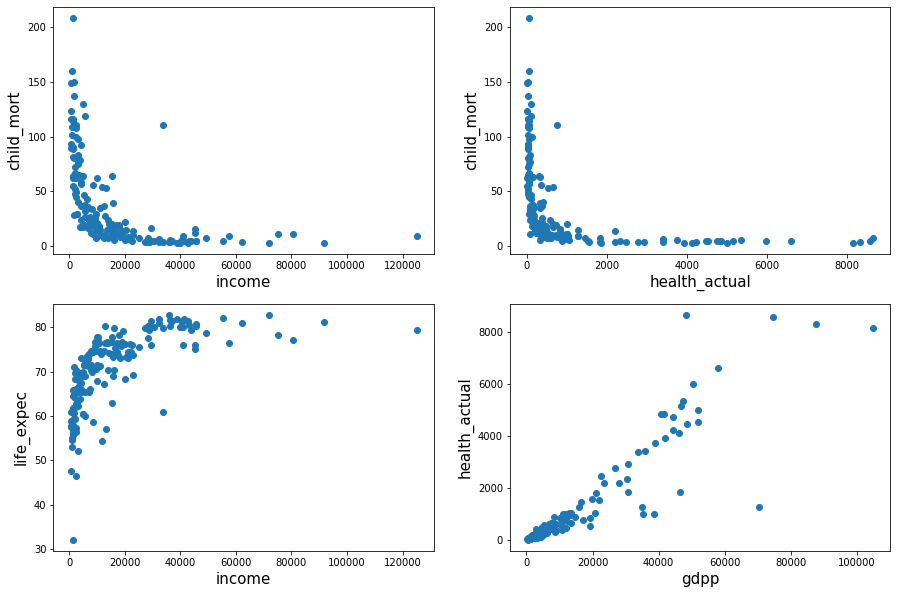

In [11]:
# Plotting scatter plot between some important variables (income, child_mort, life_expec, gdpp, health_actual ) to get 
# insight into data

plt.figure(1)
plt.figure(figsize=(15,10))
plt.subplot(2, 2, 1)
plt.scatter(x = countries_1['income'], y = countries_1['child_mort'])
plt.xlabel('income', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15) 
plt.subplot(2, 2, 2)
plt.scatter(x = countries_1['health_actual'], y = countries_1['child_mort'])
plt.xlabel('health_actual', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15) 
plt.subplot(2, 2, 3)
plt.scatter(x = countries_1['income'], y = countries_1['life_expec'])
plt.xlabel('income', fontsize = 15) 
plt.ylabel('life_expec', fontsize = 15)
plt.subplot(2, 2, 4)
plt.scatter(x = countries_1['gdpp'], y = countries_1['health_actual'])
plt.xlabel('gdpp', fontsize = 15) 
plt.ylabel('health_actual', fontsize = 15) 
plt.show()

### Inference :

#### 1. Child mortality rate is high in countries where income is low.
#### 2. Child mortality rate is high in countries where amount spent on health expenditure is less.
#### 3. Life expectancy is higher in a countries where income is higher.
#### 4. Amount spent on health expenditure in more in countries whose gdpp is generally high.

# 5. Outliers

<Figure size 432x288 with 0 Axes>

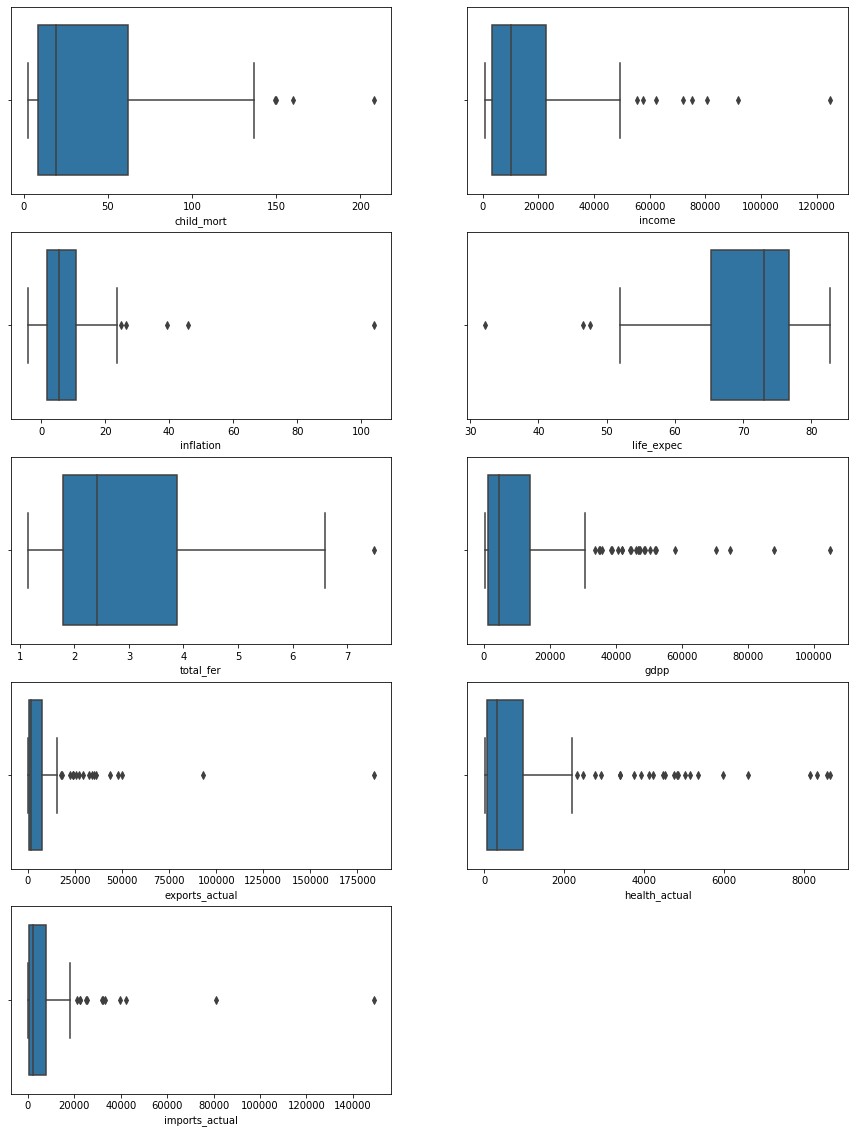

In [12]:
#Plotting Box Plots for Numerical columns for univariate analsyis

plt.figure(1)
plt.figure(figsize=(15,20))

i = 1

for item in range(1,len(countries_1.columns)):
    col = countries_1.columns[item]
    plt.subplot(5, 2, i)
    ax = sns.boxplot(countries_1[col].dropna())
    i = i+1
    
plt.show()

### Looking above boxplots we can see that there are outliers present in all columns

In [13]:
countries_1.describe()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,17144.688623,7.781832,70.555689,2.947964,12964.155689,7420.618847,1056.733204,6588.352108
std,40.328931,19278.067698,10.570704,8.893172,1.513848,18328.704809,17973.885795,1801.408906,14710.810418
min,2.600000,609.000000,-4.210000,32.100000,1.150000,231.000000,1.076920,12.821200,0.651092
25%,8.250000,3355.000000,1.810000,65.300000,1.795000,1330.000000,447.140000,78.535500,640.215000
50%,19.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000,1777.440000,321.886000,2045.580000
75%,62.100000,22800.000000,10.750000,76.800000,3.880000,14050.000000,7278.000000,976.940000,7719.600000
max,208.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000,183750.000000,8663.600000,149100.000000


# 6. Outliers Treatment - Capping method

looking towards the boxplots above we will use Capping method to treat these outliers.

In [14]:
# child_mort - Find the value of child_mort and checking data above 98th percentile.
q1 = countries_1['child_mort'].quantile(0.98)
print("q1 = ",q1)
print(countries_1[countries_1['child_mort']>q1])


q1 =  145.16000000000008
                      country  child_mort  income  inflation  life_expec  \
31   Central African Republic       149.0     888       2.01        47.5   
32                       Chad       150.0    1930       6.39        56.5   
66                      Haiti       208.0    1500       5.45        32.1   
132              Sierra Leone       160.0    1220      17.20        55.0   

     total_fer  gdpp  exports_actual  health_actual  imports_actual  
31        5.21   446          52.628        17.7508         118.190  
32        6.59   897         330.096        40.6341         390.195  
66        3.33   662         101.286        45.7442         428.314  
132       5.20   399          67.032        52.2690         137.655  


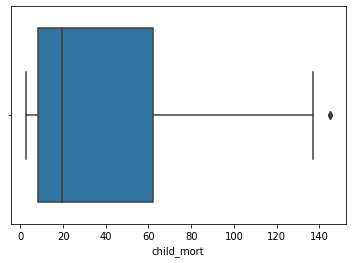

In [15]:
# Capping the outlier value in child_mort column with the value at 98th percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['child_mort']>q1, ['child_mort']] = q1

# Plotting the boxplot for child_mort after outlier treatment
sns.boxplot(countries_1['child_mort'].dropna())
plt.show()


In [16]:
# income - Find the value of income and checking data above 96th percentile.
q2 = countries_1['income'].quantile(0.96)
print("q2 = ",q2)
print(countries_1[countries_1['income']>q2])

q2 =  56255.99999999997
                  country  child_mort  income  inflation  life_expec  \
23                 Brunei        10.5   80600     16.700        77.1   
82                 Kuwait        10.8   75200     11.200        78.2   
91             Luxembourg         2.8   91700      3.620        81.3   
114                Norway         3.2   62300      5.950        81.0   
123                 Qatar         9.0  125000      6.980        79.5   
133             Singapore         2.8   72100     -0.046        82.7   
157  United Arab Emirates         8.6   57600     12.500        76.5   

     total_fer    gdpp  exports_actual  health_actual  imports_actual  
23        1.84   35300         23792.2        1002.52          9884.0  
82        2.21   38500         25679.5        1012.55         11704.0  
91        1.63  105000        183750.0        8158.50        149100.0  
114       1.95   87800         34856.6        8323.44         25023.0  
123       2.07   70300         43796.9 

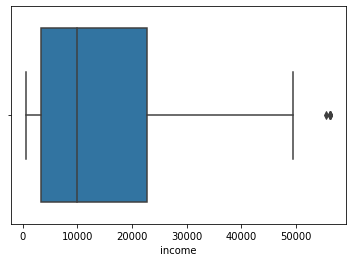

In [17]:
# Capping the outlier value in income column with the value at 96th percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['income']>q2, ['income']] = q2

# Plotting the boxplot for income after outlier treatment
sns.boxplot(countries_1['income'].dropna())
plt.show()

In [18]:
# inflation - Find the value of inflation and checking data above 98.5th percentile.
q3 = countries_1['inflation'].quantile(0.985)
print("q3 = ",q3)
print(countries_1[countries_1['inflation']>q3])

q3 =  32.97699999999989
       country  child_mort   income  inflation  life_expec  total_fer   gdpp  \
103   Mongolia        26.1   7710.0       39.2        66.2       2.64   2650   
113    Nigeria       130.0   5150.0      104.0        60.5       5.84   2330   
163  Venezuela        17.1  16500.0       45.9        75.4       2.47  13500   

     exports_actual  health_actual  imports_actual  
103         1237.55        144.160         1502.55  
113          589.49        118.131          405.42  
163         3847.50        662.850         2376.00  


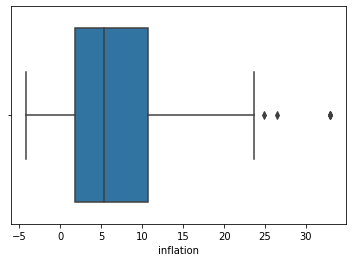

In [19]:
# Capping the outlier value in inflation column with the value at 98.5th percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['inflation']>q3, ['inflation']] = q3

# Plotting the boxplot for inflation after outlier treatment
sns.boxplot(countries_1['inflation'].dropna())
plt.show()

In [20]:
# life_expec - Find the value of life_expec and checking data below 1 percentile.
q4 = countries_1['life_expec'].quantile(0.01)
print("q4 = ",q4)
print(countries_1[countries_1['life_expec']<q4])

q4 =  47.160000000000004
    country  child_mort  income  inflation  life_expec  total_fer  gdpp  \
66    Haiti      145.16  1500.0       5.45        32.1       3.33   662   
87  Lesotho       99.70  2380.0       4.15        46.5       3.30  1170   

    exports_actual  health_actual  imports_actual  
66         101.286        45.7442         428.314  
87         460.980       129.8700        1181.700  


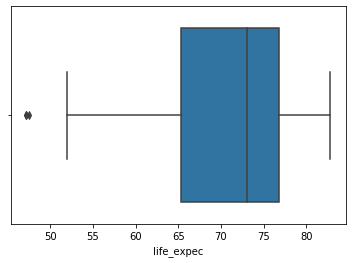

In [21]:
# Capping the outlier value in life_expec column with the value at 1 percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['life_expec']<q4, ['life_expec']] = q4

# Plotting the boxplot for life_expec after outlier treatment
sns.boxplot(countries_1['life_expec'].dropna())
plt.show()


In [22]:
# total_fer - Find the value of total_fer and checking data above 99th percentile.
q5 = countries_1['total_fer'].quantile(0.99)
print("q5 = ",q5)
print(countries_1[countries_1['total_fer']>q5])

q5 =  6.563599999999999
    country  child_mort  income  inflation  life_expec  total_fer  gdpp  \
32     Chad      145.16  1930.0       6.39        56.5       6.59   897   
112   Niger      123.00   814.0       2.55        58.8       7.49   348   

     exports_actual  health_actual  imports_actual  
32          330.096        40.6341         390.195  
112          77.256        17.9568         170.868  


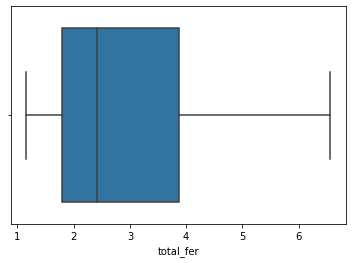

In [23]:
# Capping the outlier value in total_fer column with the value at 99th percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['total_fer']>q5, ['total_fer']] = q5

# Plotting the boxplot for total_fer after outlier treatment
sns.boxplot(countries_1['total_fer'].dropna())
plt.show()

In [24]:
# gdpp - Find the value of gdpp and checking data above 97th percentile.
q6 = countries_1['gdpp'].quantile(0.97)
print("q6 = ",q6)
print(countries_1[countries_1['gdpp']>q6])

q6 =  52217.99999999989
         country  child_mort   income  inflation  life_expec  total_fer  \
44       Denmark         4.1  44000.0      3.220        79.5       1.87   
91    Luxembourg         2.8  56256.0      3.620        81.3       1.63   
114       Norway         3.2  56256.0      5.950        81.0       1.95   
123        Qatar         9.0  56256.0      6.980        79.5       2.07   
145  Switzerland         4.5  55500.0      0.317        82.2       1.52   

       gdpp  exports_actual  health_actual  imports_actual  
44    58000         29290.0        6612.00         25288.0  
91   105000        183750.0        8158.50        149100.0  
114   87800         34856.6        8323.44         25023.0  
123   70300         43796.9        1272.43         16731.4  
145   74600         47744.0        8579.00         39761.8  


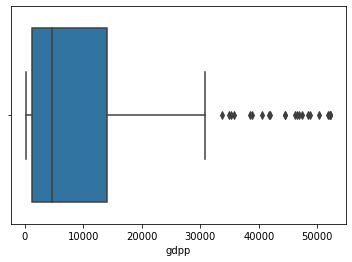

In [25]:
# Capping the outlier value in gdpp column with the value at 97th percentile in order to bring in proper clustring range.
countries_1.loc[countries_1['gdpp']>q6, ['gdpp']] = q6

# Plotting the boxplot for gdpp after outlier treatment
sns.boxplot(countries_1['gdpp'].dropna())
plt.show()

In [26]:
# exports_actual - Find the value of exports_actual and checking data above 98th percentile.
q7 = countries_1['exports_actual'].quantile(0.98)
print("q7 = ",q7)
print(countries_1[countries_1['exports_actual']>q7])

q7 =  46480.92800000003
         country  child_mort   income  inflation  life_expec  total_fer  \
73       Ireland         4.2  45700.0     -3.220        80.4       2.05   
91    Luxembourg         2.8  56256.0      3.620        81.3       1.63   
133    Singapore         2.8  56256.0     -0.046        82.7       1.15   
145  Switzerland         4.5  55500.0      0.317        82.2       1.52   

        gdpp  exports_actual  health_actual  imports_actual  
73   48700.0         50161.0        4475.53         42125.5  
91   52218.0        183750.0        8158.50        149100.0  
133  46600.0         93200.0        1845.36         81084.0  
145  52218.0         47744.0        8579.00         39761.8  


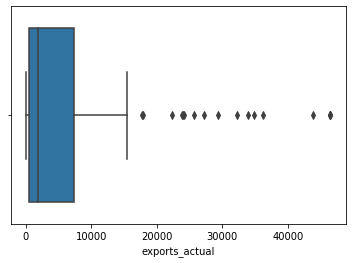

In [27]:
# Capping the outlier value in exports_actual column with the value at 98th percentile in order to bring in proper 
# clustring range.
countries_1.loc[countries_1['exports_actual']>q7, ['exports_actual']] = q7


# Plotting the boxplot for exports_actual after outlier treatment
sns.boxplot(countries_1['exports_actual'].dropna())
plt.show()


In [28]:
# health_actual - Find the value of health_actual and checking data above 97th percentile.
q8 = countries_1['health_actual'].quantile(0.97)
print("q8 = ",q8)
print(countries_1[countries_1['health_actual']>q8])

q8 =  5998.22599999999
           country  child_mort   income  inflation  life_expec  total_fer  \
44         Denmark         4.1  44000.0      3.220        79.5       1.87   
91      Luxembourg         2.8  56256.0      3.620        81.3       1.63   
114         Norway         3.2  56256.0      5.950        81.0       1.95   
145    Switzerland         4.5  55500.0      0.317        82.2       1.52   
159  United States         7.3  49400.0      1.220        78.7       1.93   

        gdpp  exports_actual  health_actual  imports_actual  
44   52218.0       29290.000        6612.00         25288.0  
91   52218.0       46480.928        8158.50        149100.0  
114  52218.0       34856.600        8323.44         25023.0  
145  52218.0       46480.928        8579.00         39761.8  
159  48400.0        6001.600        8663.60          7647.2  


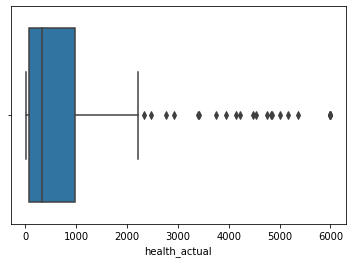

In [29]:
# Capping the outlier value in health_actual column with the value at 97th percentile in order to bring in proper 
# clustring range.
countries_1.loc[countries_1['health_actual']>q8, ['health_actual']] = q8

# Plotting the boxplot for health_actual after outlier treatment
sns.boxplot(countries_1['health_actual'].dropna())
plt.show()


In [30]:
# imports_actual - Find the value of imports_actual and checking data above 99th percentile.
q9 = countries_1['imports_actual'].quantile(0.99)
print("q9 = ",q9)
print(countries_1[countries_1['imports_actual']>q9])

q9 =  55371.39000000013
        country  child_mort   income  inflation  life_expec  total_fer  \
91   Luxembourg         2.8  56256.0      3.620        81.3       1.63   
133   Singapore         2.8  56256.0     -0.046        82.7       1.15   

        gdpp  exports_actual  health_actual  imports_actual  
91   52218.0       46480.928       5998.226        149100.0  
133  46600.0       46480.928       1845.360         81084.0  


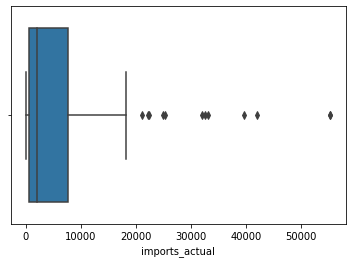

In [31]:
# Capping the outlier value in imports_actual column with the value at 99th percentile in order to bring in proper 
# clustring range.
countries_1.loc[countries_1['imports_actual']>q9, ['imports_actual']] = q9

# Plotting the boxplot for imports_actual after outlier treatment
sns.boxplot(countries_1['imports_actual'].dropna())
plt.show()

# 7. Rescaling the data

In [32]:
countries_2 = countries_1.drop('country', axis = 1)

In [33]:
# rescaling the values
scale = StandardScaler()
countries_3 = scale.fit_transform(countries_2)
countries_3

array([[ 1.36298718, -0.92685981,  0.30442817, ..., -0.60700492,
        -0.60696248, -0.59874076],
       [-0.54971956, -0.39549157, -0.38112672, ..., -0.5008812 ,
        -0.46301806, -0.41358425],
       [-0.27164942, -0.20580844,  1.22681111, ..., -0.44562948,
        -0.51519544, -0.4760999 ],
       ...,
       [-0.37560088, -0.74292465,  0.67282736, ..., -0.52054997,
        -0.57658682, -0.51333679],
       [ 0.48199861, -0.74356331,  2.26553063, ..., -0.57412302,
        -0.5904387 , -0.57720218],
       [ 1.17847335, -0.82020296,  0.93596964, ..., -0.55979014,
        -0.57888633, -0.57714896]])

In [34]:
# Converting array to Dataframe
countries_3 = pd.DataFrame(countries_3)
countries_3.columns = ['child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports_actual', 'health_actual', 'imports_actual']
countries_3.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
0,1.362987,-0.926860,0.304428,-1.693071,1.926396,-0.748206,-0.607005,-0.606962,-0.598741
1,-0.549720,-0.395492,-0.381127,0.662026,-0.865054,-0.520168,-0.500881,-0.463018,-0.413584
2,-0.271649,-0.205808,1.226811,0.685460,-0.034983,-0.496314,-0.445629,-0.515195,-0.476100
3,2.111438,-0.652873,2.099336,-1.236112,2.153997,-0.556273,-0.398254,-0.569579,-0.463973
4,-0.713443,0.190163,-0.803539,0.720610,-0.543736,0.002701,-0.071888,-0.165059,0.139728


# 8. Checking the Hopkins score

In [35]:
## Hopkins Score

from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [36]:
# Checking the hopkins score for rescaled data
hopkins(countries_3)

0.8911909073899728

### As we are getting Hoplins score more than 0.80, we can say our data is good for clustering.

# 9. Kmeans Clustering

## Run K Means and choose K using Silhouette score

For n_clusters=2, the silhouette score is 0.4798895400488365
For n_clusters=3, the silhouette score is 0.40597843119599225
For n_clusters=4, the silhouette score is 0.39177472154637527
For n_clusters=5, the silhouette score is 0.38023545255408897
For n_clusters=6, the silhouette score is 0.28974887398280713
For n_clusters=7, the silhouette score is 0.31746286571702287
For n_clusters=8, the silhouette score is 0.3332305032834471
For n_clusters=9, the silhouette score is 0.30666644301048496


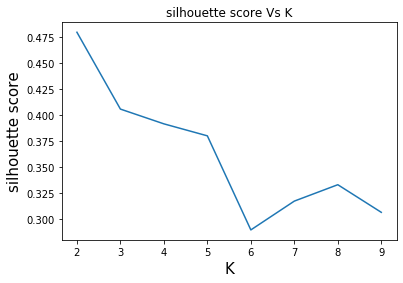

In [37]:
# silhouette score - To choose the value of K
from sklearn.metrics import silhouette_score
ss = []
for num_clusters in range(2, 10):
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(countries_3)
    ss.append([num_clusters, silhouette_score(countries_3, kmeans.labels_)])

    
    # silhouette score
    cluster_labels = kmeans.labels_
    silhouette_avg = silhouette_score(countries_3, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    
# Plotting the silhouette score against K  
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1])
plt.ylabel('silhouette score', fontsize = 15) 
plt.xlabel('K', fontsize = 15) 
plt.title('silhouette score Vs K')
plt.show()

#### From above silhouette score list, we can say that for cluster number = 3, silhouette score = 0.40 and after that there is less variation so we can choose k = 3 as optimum value fro clustering.

## Run K Means and choose K using Elbow curve method

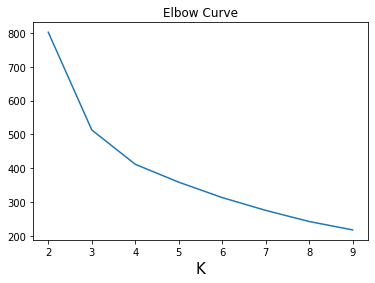

In [38]:
# Elbow curve - To choose the value of K
ssd = []
for k in range(2, 10):
    model= KMeans(n_clusters = k).fit(countries_3)
    ssd.append([k, model.inertia_])
    
# Plotting the Elbow curve
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1])
plt.xlabel('K', fontsize = 15) 
plt.title('Elbow Curve')
plt.show()

#### From above Elbow curve we can say that curve is bending at K = 3, so we can choose the value of K as 3.

## Run K Means with the chosen K = 3

In [39]:
# Let's run kmean with 3
kmean = KMeans(n_clusters = 3, random_state = 100)
kmean.fit(countries_3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

## Adding labels to data and renaming Label column

In [40]:
# Sdding labels to dataframe countries_1
countries_km = pd.concat([countries_1, pd.Series(kmean.labels_)], axis =1)

In [41]:
countries_km.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual,0
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,1
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,2
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,1
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,2


In [42]:
# Renaming column
countries_km.columns = ['country','child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports_actual', 'health_actual', 'imports_actual', 'Label_Km']
countries_km.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual,Label_Km
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,1
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,2
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,2
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,1
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,2


## Count of countries based on labels - Kmeans

In [43]:
countries_km.Label_Km.value_counts()

2    88
1    49
0    30
Name: Label_Km, dtype: int64

## Centroid of clusters - Kmeans

In [44]:
countries_km.groupby("Label_Km").mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
Label_Km,,,,,,,,,
0,4.970000,43086.400000,2.839800,80.510000,1.796667,42219.666667,23529.853733,3845.062667,20941.719333
1,89.047755,3860.877551,10.473714,59.771837,4.942392,1885.306122,863.367571,113.379124,818.976510
2,20.367045,13757.727273,6.943080,73.345455,2.219091,7629.931818,3433.084506,513.881568,3550.365376


## Visualizing the clusters - Kmeans

### Visualizing clusters based on 'gdpp' and 'income' - Kmeans

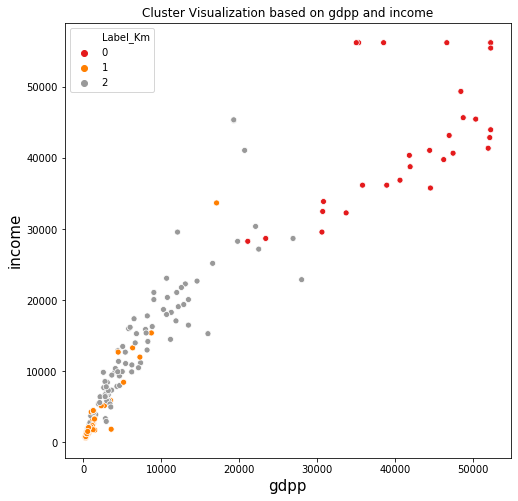

In [45]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "gdpp" , y = "income", hue = 'Label_Km', data = countries_km, palette = "Set1")
plt.xlabel('gdpp', fontsize = 15) 
plt.ylabel('income', fontsize = 15)
plt.title("Cluster Visualization based on gdpp and income")
plt.show()

### Visualizing clusters based on 'gdpp' and 'child_mort' - Kmeans

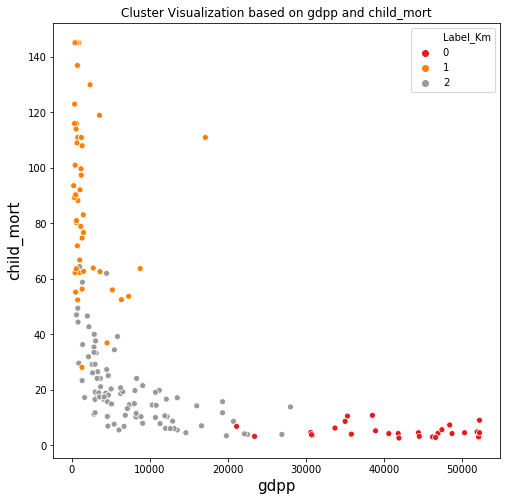

In [46]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'Label_Km', data = countries_km, palette = "Set1")
plt.xlabel('gdpp', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15)
plt.title("Cluster Visualization based on gdpp and child_mort")
plt.show()

### Visualizing clusters based on 'income' and 'child_mort' - Kmeans

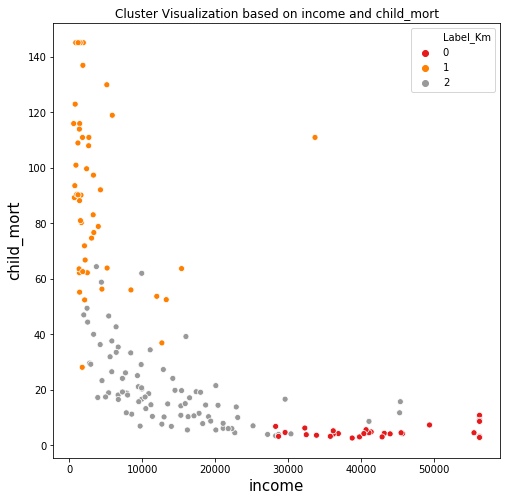

In [47]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "income" , y = "child_mort", hue = 'Label_Km', data = countries_km, palette = "Set1")
plt.xlabel('income', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15)
plt.title("Cluster Visualization based on income and child_mort")
plt.show()

## Clustering profiling using “gdpp, child_mort and income” - Kmeans

### Below is the list of countries provided for each label based on below sorting method 
####  Low gdpp
####  High child_mort
####  Low income

### List of countries - Kmeans - Label 0

In [48]:
# List of countries - Kmeans - Label 0
print("List of countries with Label 0 by Kmeans clustering")
print(countries_km.loc[countries_km['Label_Km'] == 0, ['country', 'Label_Km']])

List of countries with Label 0 by Kmeans clustering
                  country  Label_Km
7               Australia         0
8                 Austria         0
15                Belgium         0
23                 Brunei         0
29                 Canada         0
42                 Cyprus         0
44                Denmark         0
53                Finland         0
54                 France         0
58                Germany         0
68                Iceland         0
73                Ireland         0
74                 Israel         0
75                  Italy         0
77                  Japan         0
82                 Kuwait         0
91             Luxembourg         0
98                  Malta         0
110           Netherlands         0
111           New Zealand         0
114                Norway         0
123                 Qatar         0
133             Singapore         0
135              Slovenia         0
139                 Spain         0
144         

In [49]:
# Cluster 0 Sorted by Low gdpp, High Child_mort, low income
Kmeans_label0 = countries_km.loc[countries_km['Label_Km'] == 0, ['country','gdpp','child_mort','income','Label_Km']].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True])
Kmeans_label0.head()

,country,gdpp,child_mort,income,Label_Km
98,Malta,21100.0,6.8,28300.0,0
135,Slovenia,23400.0,3.2,28700.0,0
74,Israel,30600.0,4.6,29600.0,0
139,Spain,30700.0,3.8,32500.0,0
42,Cyprus,30800.0,3.6,33900.0,0


### List of countries - Kmeans - Label 1

In [50]:
# List of countries - Kmeans - Label 1
print("List of countries with Label 1 by Kmeans clustering")
print(countries_km.loc[countries_km['Label_Km'] == 1, ['country', 'Label_Km']])

List of countries with Label 1 by Kmeans clustering
                      country  Label_Km
0                 Afghanistan         1
3                      Angola         1
17                      Benin         1
21                   Botswana         1
25               Burkina Faso         1
26                    Burundi         1
28                   Cameroon         1
31   Central African Republic         1
32                       Chad         1
36                    Comoros         1
37           Congo, Dem. Rep.         1
38                Congo, Rep.         1
40              Cote d'Ivoire         1
49          Equatorial Guinea         1
50                    Eritrea         1
55                      Gabon         1
56                     Gambia         1
59                      Ghana         1
63                     Guinea         1
64              Guinea-Bissau         1
66                      Haiti         1
72                       Iraq         1
80                      Keny

In [51]:
# Cluster 1 Sorted by Low gdpp, High Child_mort, low income
Kmeans_label1 = countries_km.loc[countries_km['Label_Km'] == 1, ['country','gdpp','child_mort','income','Label_Km']].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True,False,True])
Kmeans_label1.head()

,country,gdpp,child_mort,income,Label_Km
26,Burundi,231.0,93.60,764.0,1
88,Liberia,327.0,89.30,700.0,1
37,"Congo, Dem. Rep.",334.0,116.00,609.0,1
112,Niger,348.0,123.00,814.0,1
132,Sierra Leone,399.0,145.16,1220.0,1


In [52]:
# Cluster 1 Sorted by High Child_mort, Low gdpp. low income
kmeans_label = countries_km.loc[countries_km['Label_Km'] == 1, ['country','gdpp','child_mort','income','Label_Km']].sort_values(by = ['child_mort','gdpp','income'], ascending = [False,True,True])
kmeans_label.head()

,country,gdpp,child_mort,income,Label_Km
132,Sierra Leone,399.0,145.16,1220.0,1
31,Central African Republic,446.0,145.16,888.0,1
66,Haiti,662.0,145.16,1500.0,1
32,Chad,897.0,145.16,1930.0,1
97,Mali,708.0,137.00,1870.0,1


### List of countries - Kmeans - Label 2

In [53]:
# List of countries - Kmeans - Label 2
print("List of countries with Label 2 by Kmeans clustering")
print(countries_km.loc[countries_km['Label_Km'] == 2, ['country', 'Label_Km']])

List of countries with Label 2 by Kmeans clustering
                            country  Label_Km
1                           Albania         2
2                           Algeria         2
4               Antigua and Barbuda         2
5                         Argentina         2
6                           Armenia         2
9                        Azerbaijan         2
10                          Bahamas         2
11                          Bahrain         2
12                       Bangladesh         2
13                         Barbados         2
14                          Belarus         2
16                           Belize         2
18                           Bhutan         2
19                          Bolivia         2
20           Bosnia and Herzegovina         2
22                           Brazil         2
24                         Bulgaria         2
27                         Cambodia         2
30                       Cape Verde         2
33                          

In [54]:
# Cluster 2 Sorted by Low gdpp, High Child_mort, low income
Kmeans_label2 = countries_km.loc[countries_km['Label_Km'] == 2, ['country','gdpp','child_mort','income','Label_Km']].sort_values(by = ['gdpp', 'child_mort', 'income'], ascending = [True,False,True])
Kmeans_label2.head()

,country,gdpp,child_mort,income,Label_Km
109,Nepal,592.0,47.0,1990.0,2
12,Bangladesh,758.0,49.4,2440.0,2
27,Cambodia,786.0,44.4,2520.0,2
83,Kyrgyz Republic,880.0,29.6,2790.0,2
107,Myanmar,988.0,64.4,3720.0,2


## Analysis of countries based on Socio-economic and health factors - Kmeans

<Figure size 432x288 with 0 Axes>

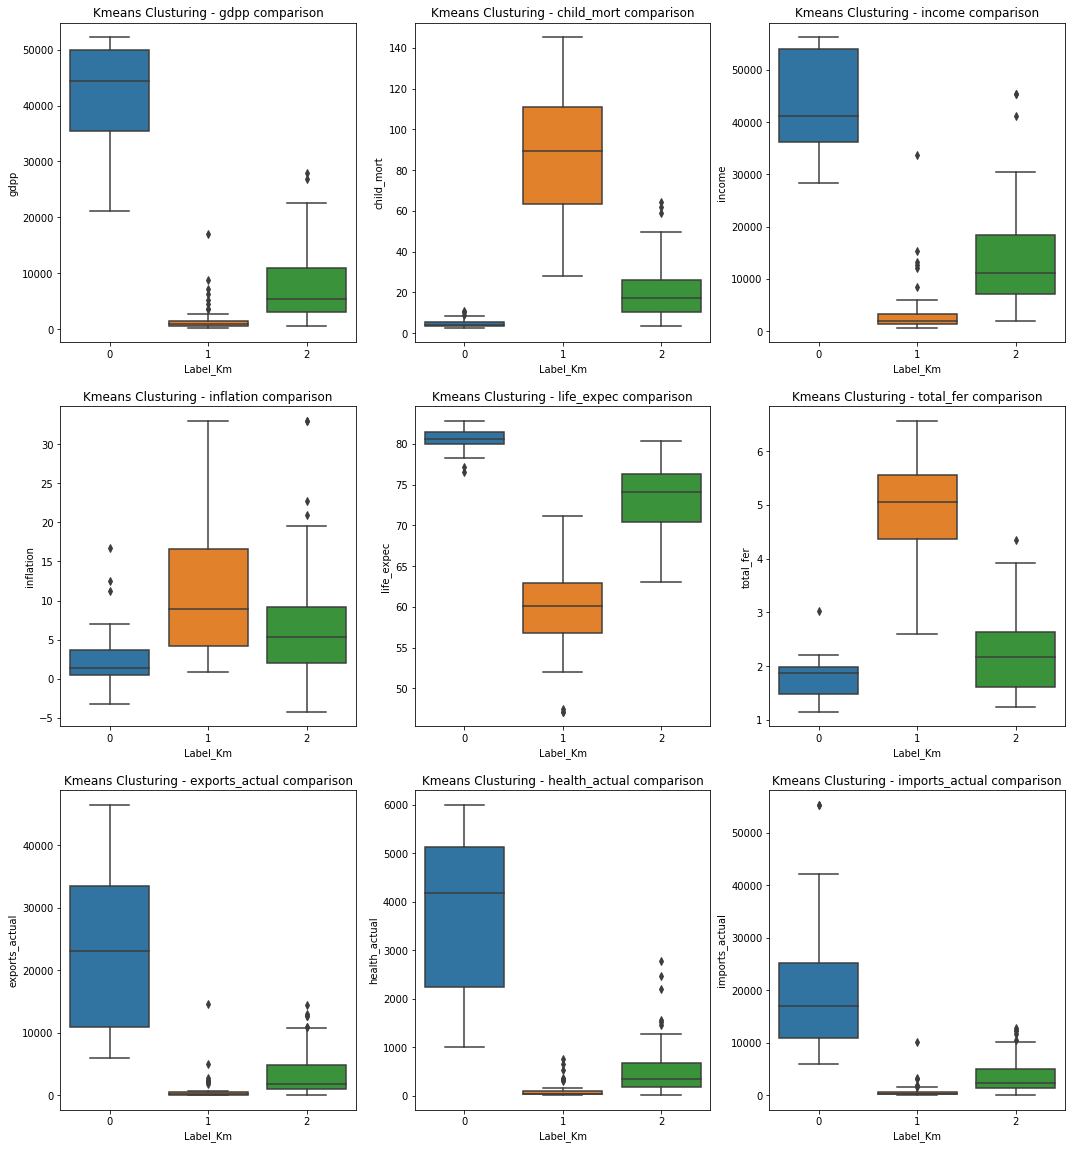

In [55]:
plt.figure(1)
plt.figure(figsize=(18,20))

plt.subplot(3, 3, 1)
sns.boxplot(x='Label_Km', y='gdpp', data=countries_km)
plt.title("Kmeans Clusturing - gdpp comparison")
plt.subplot(3, 3, 2)
sns.boxplot(x='Label_Km', y='child_mort', data=countries_km)
plt.title("Kmeans Clusturing - child_mort comparison")
plt.subplot(3, 3, 3)
sns.boxplot(x='Label_Km', y='income', data=countries_km)
plt.title("Kmeans Clusturing - income comparison")
plt.subplot(3, 3, 4)
sns.boxplot(x='Label_Km', y='inflation', data=countries_km)
plt.title("Kmeans Clusturing - inflation comparison")
plt.subplot(3, 3, 5)
sns.boxplot(x='Label_Km', y='life_expec', data=countries_km)
plt.title("Kmeans Clusturing - life_expec comparison")
plt.subplot(3, 3, 6)
sns.boxplot(x='Label_Km', y='total_fer', data=countries_km)
plt.title("Kmeans Clusturing - total_fer comparison")
plt.subplot(3, 3, 7)
sns.boxplot(x='Label_Km', y='exports_actual', data=countries_km)
plt.title("Kmeans Clusturing - exports_actual comparison")
plt.subplot(3, 3, 8)
sns.boxplot(x='Label_Km', y='health_actual', data=countries_km)
plt.title("Kmeans Clusturing - health_actual comparison")
plt.subplot(3, 3, 9)
sns.boxplot(x='Label_Km', y='imports_actual', data=countries_km)
plt.title("Kmeans Clusturing - imports_actual comparison")

plt.show()

### Inference - Kmeans clustering - Socioeconomic and health factors

#### Kmeans - Cluster with Label 0 : 

For these countries, Average gdpp, income is higher.Average Inflation rate is lesser in these countries.
Countries in this cluster spend higher average amount on healthcare which results in low average child mortaliry rate resulting the average highest life expectancy. Average number of children borm to woman in these countries is 2.
These countries also has highest average of exoprt and import of goods and services.

Overall these countries are having good economic condition with healthy environment, so these countries are not in dire need of financial help right now.

Few examples of countries in this cluster are : Luxembourg, Norway, Switzerland, Malta, etc.

#### Kmeans - Cluster with Label 1 : 

For these countries, Average gdpp, income is lowest. Average Inflation rate is highest in these countries.
Countries in this cluster spend lowest average amount on healthcare which results in high average child mortaliry rate resulting the average lowest life expectancy. Average number of children borm to woman in these countries is more than 5.
These countries also has lowest average of exoprt and import of goods and services.

Overall these countries are having bad economic condition with unhealthy environment, so these countries are in dire need of financial help right now.

Few examples of countries in this cluster are : Burundi, Liberia, Congo Dem. Rep., Niger, Sierra Leone, etc.

#### Kmeans - Cluster with Label 2 : 

For these countries, Average gdpp, income is little bit higher than countries in cluster with label 1 . Average Inflation rate is lower than countries in cluster with label 1.
Countries in this cluster spend low average amount as compared to countries in cluster with label 0, on healthcare which results in average child mortaliry rate resulting the average lowest life expectancy. Average number of children borm to woman in these countries is more than 2 to 3.
These countries also has lower average of exoprt and import of goods and services.

Overall these countries are having average economic condition with not so healthy environment, so these countries will need financial help but these are not in dire need right now.

Few examples of countries in this cluster are : Nepal, Bangladesh, South Korea, Myannmar etc.

# 10. Hierarchical Clustering

In [56]:
# Using Scaled dataframe - countries_3
countries_3.head()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
0,1.362987,-0.926860,0.304428,-1.693071,1.926396,-0.748206,-0.607005,-0.606962,-0.598741
1,-0.549720,-0.395492,-0.381127,0.662026,-0.865054,-0.520168,-0.500881,-0.463018,-0.413584
2,-0.271649,-0.205808,1.226811,0.685460,-0.034983,-0.496314,-0.445629,-0.515195,-0.476100
3,2.111438,-0.652873,2.099336,-1.236112,2.153997,-0.556273,-0.398254,-0.569579,-0.463973
4,-0.713443,0.190163,-0.803539,0.720610,-0.543736,0.002701,-0.071888,-0.165059,0.139728


## Hierarchical Clustering - Single linkage method

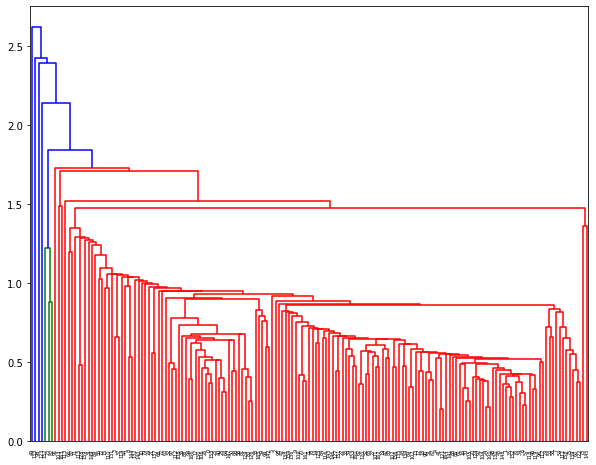

In [57]:
# single linkage
mergings_single = linkage(countries_3, method="single", metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(mergings_single)
plt.show()

#### Dendrogram plotted by Single linkage method is not very useful as the cluster formation is not much clear.

## Hierarchical Clustering - Complete linkage method

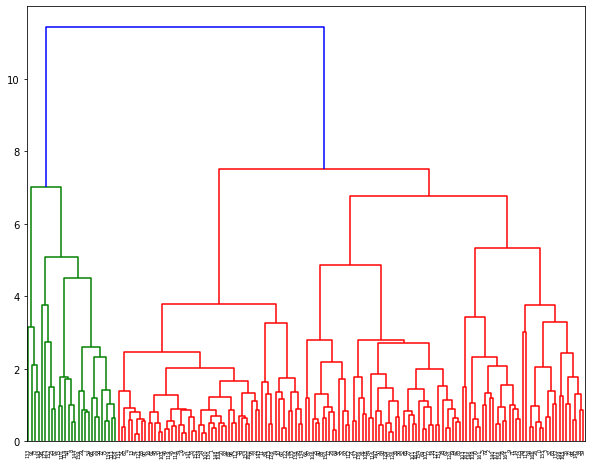

In [58]:
# complete linkage
mergings_complete = linkage(countries_3, method="complete", metric='euclidean')
plt.figure(figsize=(10,8))
dendrogram(mergings_complete)
plt.show()

#### Dendrogram plotted by Complete linkage method is interpretable and we will use the same to form a clusters with k value as 3.

## Chossing complete linkage hierarchical clustering with the chosen K = 3

In [59]:
# 3 clusters with complete linkage to create clusters and associated labels
cluster_labels = cut_tree(mergings_complete, n_clusters=3).reshape(-1, )
print(cluster_labels)

[0 1 0 0 1 0 1 2 2 0 1 1 0 1 0 2 1 0 0 0 1 0 1 2 1 0 0 0 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 1 1 2 1 1 0 1 0 0 1 0 2 2 0 0 1 2 0 1 1 0 0 0 0 0 1 2 0 0 0 0 2
 1 2 0 2 0 0 0 0 2 0 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 0 0 0 1 1 0 0 0 0 2
 2 0 0 2 1 0 1 1 1 0 1 1 2 1 0 0 0 1 0 1 1 0 2 1 1 0 0 1 2 0 1 0 1 2 2 0 0
 1 0 0 0 1 1 0 0 0 2 2 2 1 0 0 0 0 0 0]


## Adding labels to data and renaming Label column

In [60]:
# Adding the labels to dataframe
countries_hier = pd.concat([countries_1, pd.Series(cluster_labels)], axis =1)

In [61]:
countries_hier.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual,0
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,0
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,1


In [62]:
# Renaming the columns in the dataframe
countries_hier.columns = ['country','child_mort', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp', 'exports_actual', 'health_actual', 'imports_actual', 'Label_Hier']
countries_hier.head()

,country,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual,Label_Hier
0,Afghanistan,90.2,1610.0,9.44,56.2,5.82,553.0,55.30,41.9174,248.297,0
1,Albania,16.6,9930.0,4.49,76.3,1.65,4090.0,1145.20,267.8950,1987.740,1
2,Algeria,27.3,12900.0,16.10,76.5,2.89,4460.0,1712.64,185.9820,1400.440,0
3,Angola,119.0,5900.0,22.40,60.1,6.16,3530.0,2199.19,100.6050,1514.370,0
4,Antigua and Barbuda,10.3,19100.0,1.44,76.8,2.13,12200.0,5551.00,735.6600,7185.800,1


## Count of countries based on labels - Hierarchical Clustering

In [63]:
countries_hier.Label_Hier.value_counts()

0    84
1    56
2    27
Name: Label_Hier, dtype: int64

## Centroid of the cluster - Hierarchical Clustering

In [64]:
countries_hier.groupby("Label_Hier").mean()

,child_mort,income,inflation,life_expec,total_fer,gdpp,exports_actual,health_actual,imports_actual
Label_Hier,,,,,,,,,
0,64.577857,5766.464286,10.878643,64.052619,3.976157,2667.428571,1067.958066,153.412430,1073.366334
1,13.258929,17994.285714,3.806964,75.778571,1.955000,11152.678571,5284.388750,790.464125,5444.557679
2,5.100000,44458.962963,3.051889,80.537037,1.773333,43770.000000,24617.696741,4036.162963,21694.651111


## Visualizing the clusters - Hierarchical Clustering

### Visualizing clusters based on 'gdpp' and 'income' - Hierarchical Clustering

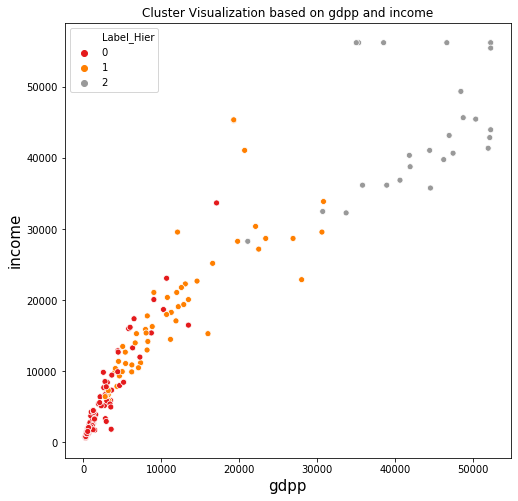

In [65]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "gdpp" , y = "income", hue = 'Label_Hier', data = countries_hier, palette = "Set1")
plt.xlabel('gdpp', fontsize = 15) 
plt.ylabel('income', fontsize = 15)
plt.title("Cluster Visualization based on gdpp and income")
plt.show()

### Visualizing clusters based on 'gdpp' and 'child_mort' - Hierarchical Clustering

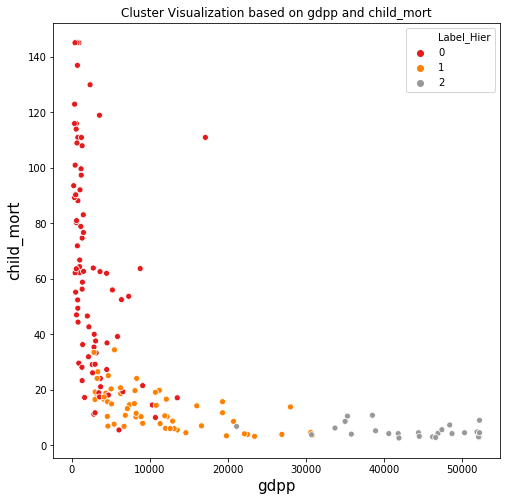

In [66]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "gdpp" , y = "child_mort", hue = 'Label_Hier', data = countries_hier, palette = "Set1")
plt.xlabel('gdpp', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15)
plt.title("Cluster Visualization based on gdpp and child_mort")
plt.show()

### Visualizing clusters based on 'income' and 'child_mort' - Hierarchical Clustering

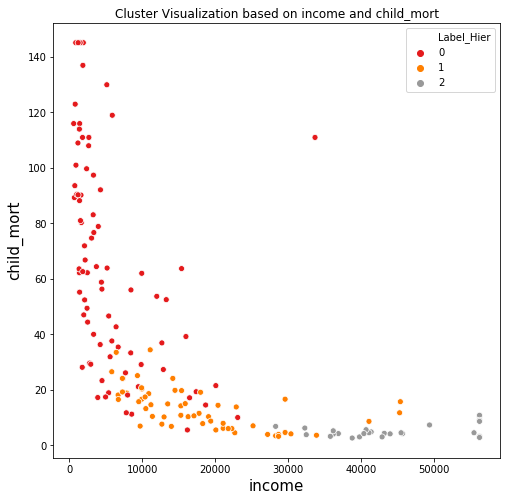

In [67]:
plt.figure(figsize=(8,8))
sns.scatterplot(x = "income" , y = "child_mort", hue = 'Label_Hier', data = countries_hier, palette = "Set1")
plt.xlabel('income', fontsize = 15) 
plt.ylabel('child_mort', fontsize = 15)
plt.title("Cluster Visualization based on income and child_mort")
plt.show()

## Clustering profiling using “gdpp, child_mort and income” - Hierarchical clustering

### Below is the list of countries provided for each label based on below sorting method 
####  Low gdpp
####  High child_mort
####  Low income

### List of countries - Hierarchical clustering - Label 0

In [68]:
# List of countries - Hierarchical clustering - Label 0
print("List of countries with Label 0 by Hierarchical clustering")
print(countries_hier.loc[countries_hier['Label_Hier'] == 0, ['country', 'Label_Hier']])

List of countries with Label 0 by Hierarchical clustering
                      country  Label_Hier
0                 Afghanistan           0
2                     Algeria           0
3                      Angola           0
5                   Argentina           0
9                  Azerbaijan           0
12                 Bangladesh           0
14                    Belarus           0
17                      Benin           0
18                     Bhutan           0
19                    Bolivia           0
21                   Botswana           0
25               Burkina Faso           0
26                    Burundi           0
27                   Cambodia           0
28                   Cameroon           0
31   Central African Republic           0
32                       Chad           0
36                    Comoros           0
37           Congo, Dem. Rep.           0
38                Congo, Rep.           0
40              Cote d'Ivoire           0
47                

In [69]:
# Cluster 0 Sorted by Low gdpp, High Child_mort, low income
KHier_label0 = countries_hier.loc[countries_hier['Label_Hier'] == 0, ['country','gdpp','child_mort','income','Label_Hier']].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True])
KHier_label0.head()

,country,gdpp,child_mort,income,Label_Hier
26,Burundi,231.0,93.60,764.0,0
88,Liberia,327.0,89.30,700.0,0
37,"Congo, Dem. Rep.",334.0,116.00,609.0,0
112,Niger,348.0,123.00,814.0,0
132,Sierra Leone,399.0,145.16,1220.0,0


In [70]:
# Cluster 0 Sorted by High Child_mort, Low gdpp, low income
KHier_label = countries_hier.loc[countries_hier['Label_Hier'] == 0, ['country','gdpp','child_mort','income','Label_Hier']].sort_values(by = ['child_mort','gdpp','income'], ascending = [False,True,True])
KHier_label.head()

,country,gdpp,child_mort,income,Label_Hier
132,Sierra Leone,399.0,145.16,1220.0,0
31,Central African Republic,446.0,145.16,888.0,0
66,Haiti,662.0,145.16,1500.0,0
32,Chad,897.0,145.16,1930.0,0
97,Mali,708.0,137.00,1870.0,0


### List of countries - Hierarchical clustering - Label 1

In [71]:
# List of countries - Hierarchical clustering - Label 1
print("List of countries with Label 1 by Hierarchical clustering")
print(countries_hier.loc[countries_hier['Label_Hier'] == 1, ['country', 'Label_Hier']])

List of countries with Label 1 by Hierarchical clustering
                            country  Label_Hier
1                           Albania           1
4               Antigua and Barbuda           1
6                           Armenia           1
10                          Bahamas           1
11                          Bahrain           1
13                         Barbados           1
16                           Belize           1
20           Bosnia and Herzegovina           1
22                           Brazil           1
24                         Bulgaria           1
30                       Cape Verde           1
33                            Chile           1
34                            China           1
35                         Colombia           1
39                       Costa Rica           1
41                          Croatia           1
42                           Cyprus           1
43                   Czech Republic           1
45               Dominican Rep

In [72]:
# Cluster 1 Sorted by Low gdpp, High Child_mort, low income
KHier_label1 = countries_hier.loc[countries_hier['Label_Hier'] == 1, ['country','gdpp','child_mort','income','Label_Hier']].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True])
KHier_label1.head()

,country,gdpp,child_mort,income,Label_Hier
105,Morocco,2830.0,33.5,6440.0,1
57,Georgia,2960.0,16.5,6730.0,1
48,El Salvador,2990.0,19.2,7300.0,1
6,Armenia,3220.0,18.1,6700.0,1
118,Paraguay,3230.0,24.1,7290.0,1


### List of countries - Hierarchical clustering - Label 2

In [73]:
# List of countries - Hierarchical clustering - Label 2
print("List of countries with Label 2 by Hierarchical clustering")
print(countries_hier.loc[countries_hier['Label_Hier'] == 2, ['country', 'Label_Hier']])

List of countries with Label 2 by Hierarchical clustering
                  country  Label_Hier
7               Australia           2
8                 Austria           2
15                Belgium           2
23                 Brunei           2
29                 Canada           2
44                Denmark           2
53                Finland           2
54                 France           2
58                Germany           2
68                Iceland           2
73                Ireland           2
75                  Italy           2
77                  Japan           2
82                 Kuwait           2
91             Luxembourg           2
98                  Malta           2
110           Netherlands           2
111           New Zealand           2
114                Norway           2
123                 Qatar           2
133             Singapore           2
139                 Spain           2
144                Sweden           2
145           Switzerland     

In [74]:
# Cluster 2 Sorted by Low gdpp, High Child_mort, low income
KHier_label2 = countries_hier.loc[countries_hier['Label_Hier'] == 2, ['country','gdpp','child_mort','income','Label_Hier']].sort_values(by = ['gdpp','child_mort','income'], ascending = [True,False,True])
KHier_label2.head()

,country,gdpp,child_mort,income,Label_Hier
98,Malta,21100.0,6.8,28300.0,2
139,Spain,30700.0,3.8,32500.0,2
111,New Zealand,33700.0,6.2,32300.0,2
157,United Arab Emirates,35000.0,8.6,56256.0,2
23,Brunei,35300.0,10.5,56256.0,2


## Analysis of countries based on Socio-economic and health factors - Hierarchical Clustering

<Figure size 432x288 with 0 Axes>

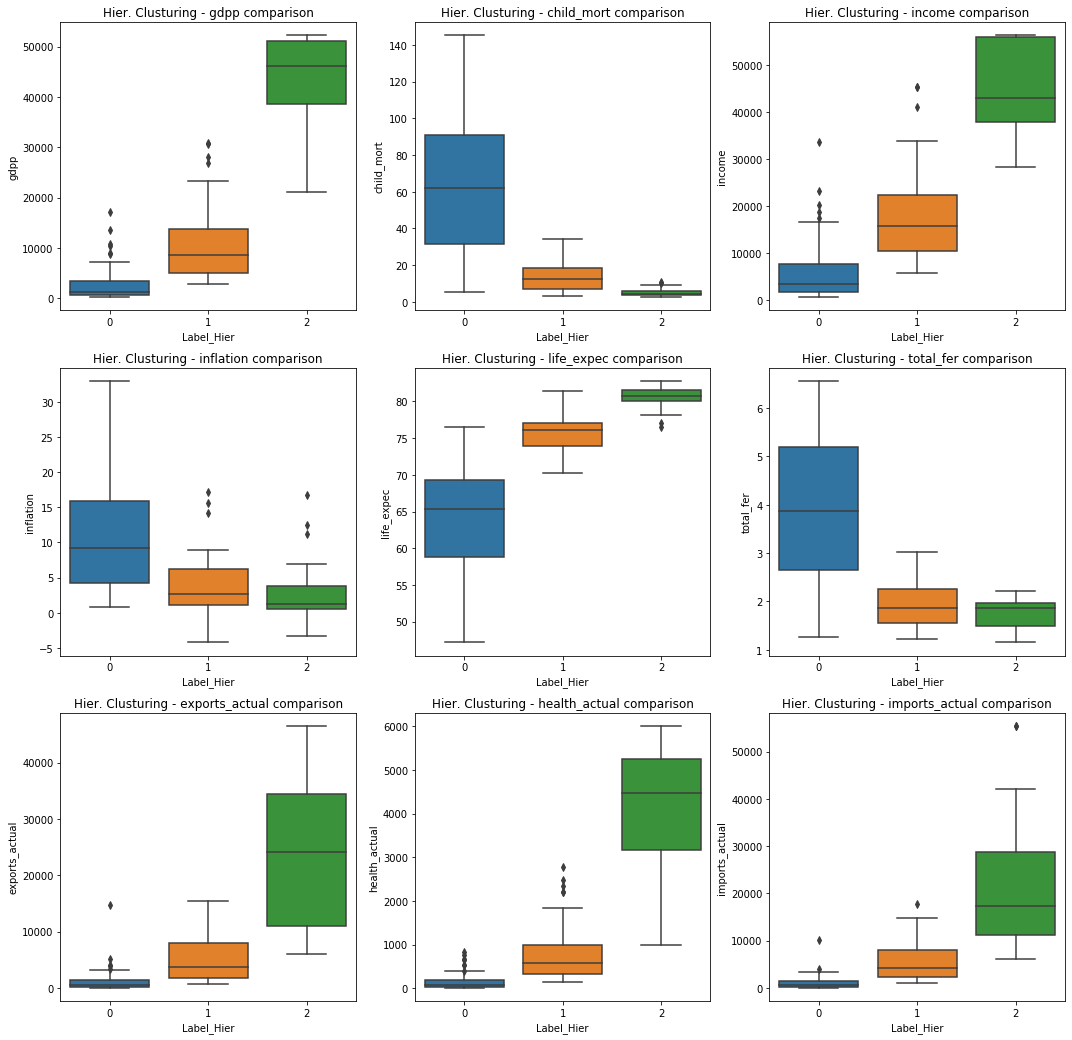

In [75]:
plt.figure(1)
plt.figure(figsize=(18,18))

plt.subplot(3, 3, 1)
sns.boxplot(x='Label_Hier', y='gdpp', data=countries_hier)
plt.title("Hier. Clusturing - gdpp comparison")
plt.subplot(3, 3, 2)
sns.boxplot(x='Label_Hier', y='child_mort', data=countries_hier)
plt.title("Hier. Clusturing - child_mort comparison")
plt.subplot(3, 3, 3)
sns.boxplot(x='Label_Hier', y='income', data=countries_hier)
plt.title("Hier. Clusturing - income comparison")
plt.subplot(3, 3, 4)
sns.boxplot(x='Label_Hier', y='inflation', data=countries_hier)
plt.title("Hier. Clusturing - inflation comparison")
plt.subplot(3, 3, 5)
sns.boxplot(x='Label_Hier', y='life_expec', data=countries_hier)
plt.title("Hier. Clusturing - life_expec comparison")
plt.subplot(3, 3, 6)
sns.boxplot(x='Label_Hier', y='total_fer', data=countries_hier)
plt.title("Hier. Clusturing - total_fer comparison")
plt.subplot(3, 3, 7)
sns.boxplot(x='Label_Hier', y='exports_actual', data=countries_hier)
plt.title("Hier. Clusturing - exports_actual comparison")
plt.subplot(3, 3, 8)
sns.boxplot(x='Label_Hier', y='health_actual', data=countries_hier)
plt.title("Hier. Clusturing - health_actual comparison")
plt.subplot(3, 3, 9)
sns.boxplot(x='Label_Hier', y='imports_actual', data=countries_hier)
plt.title("Hier. Clusturing - imports_actual comparison")

plt.show()

### Inference - Hierarchical clustering - Socioeconomic and health factors

#### Hierarchical clustering - Cluster with Label 2 : 

For these countries, Average gdpp, income is higher.Average Inflation rate is lesser in these countries.
Countries in this cluster spend higher average amount on healthcare which results in low average child mortaliry rate resulting the average highest life expectancy. Average number of children borm to woman in these countries is 2.
These countries also has highest average of exoprt and import of goods and services.

Overall these countries are having good economic condition with healthy environment, so these countries are not in dire need of financial help right now.

Few examples of countries in this cluster are : Luxembourg, Norway, Switzerland, Malta, etc.

#### Hierarchical clustering - Cluster with Label 0 : 

For these countries, Average gdpp, income is lowest. Average Inflation rate is highest in these countries.
Countries in this cluster spend lowest average amount on healthcare which results in high average child mortaliry rate resulting the average lowest life expectancy. Average number of children borm to woman in these countries is upto 4.
These countries also has lowest average of exoprt and import of goods and services.

Overall these countries are having bad economic condition with unhealthy environment, so these countries are in dire need of financial help right now.

Few examples of countries in this cluster are : Burundi, Liberia, Congo Dem. Rep., Niger, Sierra Leone, etc.

#### Hierarchical clustering - Cluster with Label 1 : 

For these countries, Average gdpp, income is little bit higher than countries in cluster with label 1 . Average Inflation rate is lower than countries in cluster with label 1.
Countries in this cluster spend low average amount as compared to countries in cluster with label 0, on healthcare which results in average child mortaliry rate resulting the average lowest life expectancy. Average number of children borm to woman in these countries is more than 2 to 3.
These countries also has lower average of exoprt and import of goods and services.

Overall these countries are having average economic condition with not so healthy environment, so these countries will need financial help but these are not in dire need right now.

Few examples of countries in this cluster are : Portugal, South Korea, Greece etc.

## Final recommendation - 

## As per Kmeans and Hierarchical clustering formation, top 5 countries in direst need of financial help sorted by Low gdpp, High Child_mort and Low Income parameters are :

### 1. Burundi
### 2. Liberia
### 3. Congo Dem. Rep.
### 4. Niger
### 5. Sierra Leone


## As per Kmeans and Hierarchical clustering formation top 5 countries in direst need of financial help sorted by High Child_mort, Low gdpp and Low Income parameters are:

### 1. Sierra Leone
### 2. Central African Republic
### 3. Haiti
### 4. Chad
### 5. Mali



# --------------------------------------------End---------------------------------------------------------------